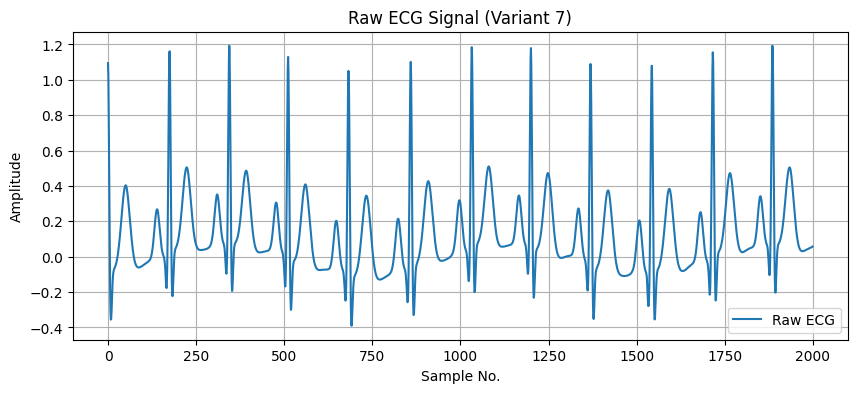

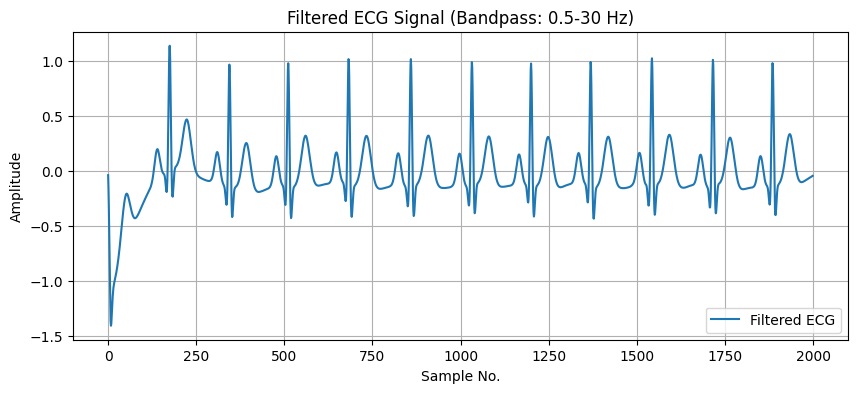

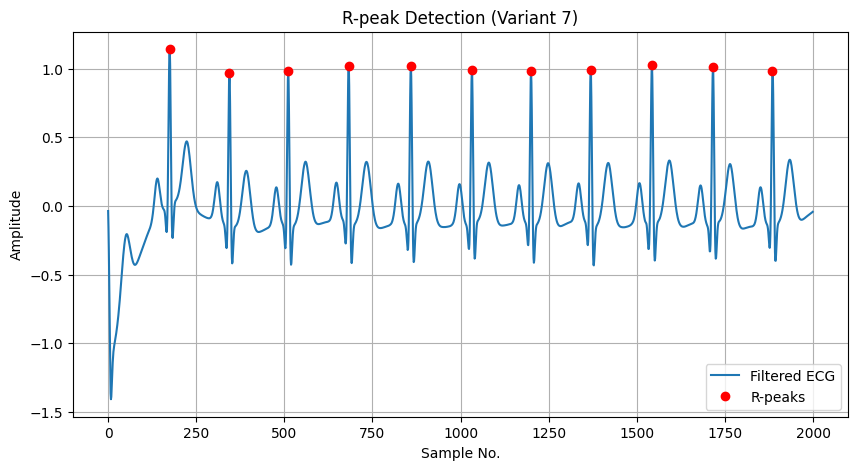

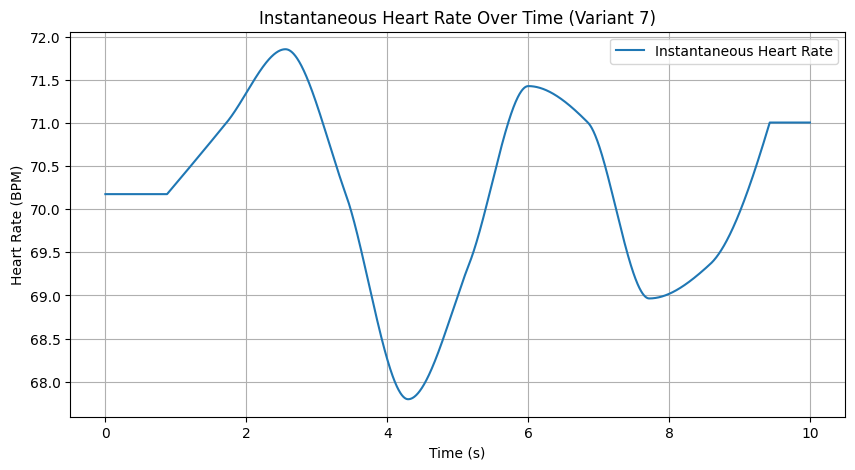

Bandpass filtering is crucial for accurate R-peak detection.
For Variant 7, a bandpass filter of 0.5-30 Hz was applied.
1. Removal of Baseline Drift:
   - Low-frequency noise (like baseline wander caused by respiration or movement) is attenuated below 0.5 Hz.
   - This prevents the baseline from obscuring the QRS complex, making R-peaks more distinct.
2. Reduction of High-Frequency Noise:
   - High-frequency noise (like muscle artifacts or power line interference) above 30 Hz is attenuated.
   - This smooths the signal and reduces spurious peaks that might be incorrectly identified as R-peaks.
Overall, filtering enhances the signal-to-noise ratio of the QRS complex, allowing the R-peak detection algorithm (NeuroKit2 in this case) to more reliably identify the true R-peaks, leading to more accurate heart rate calculations.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

duration = 10
sampling_rate = 200 

ecg = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate)
fs = sampling_rate 


plt.figure(figsize=(10, 4))
plt.plot(ecg, label="Raw ECG")
plt.title("Raw ECG Signal (Variant 7)")
plt.xlabel("Sample No.")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

lowcut = 0.5  # Hz 
highcut = 30  # Hz 
order = 4 

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, lowcut, highcut, fs, order)

plt.figure(figsize=(10, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.title(f"Filtered ECG Signal (Bandpass: {lowcut}-{highcut} Hz)")
plt.xlabel("Sample No.")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]


plt.figure(figsize=(10, 5))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection (Variant 7)")
plt.xlabel("Sample No.")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()



heart_rate = signals["ECG_Rate"]

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(heart_rate)) / fs, heart_rate, label="Instantaneous Heart Rate")
plt.title("Instantaneous Heart Rate Over Time (Variant 7)")
plt.xlabel("Time (s)")
plt.ylabel("Heart Rate (BPM)")
plt.legend()
plt.grid(True)
plt.show()


print("Bandpass filtering is crucial for accurate R-peak detection.")
print(f"For Variant 7, a bandpass filter of {lowcut}-{highcut} Hz was applied.")
print("1. Removal of Baseline Drift:")
print("   - Low-frequency noise (like baseline wander caused by respiration or movement) is attenuated below 0.5 Hz.")
print("   - This prevents the baseline from obscuring the QRS complex, making R-peaks more distinct.")
print("2. Reduction of High-Frequency Noise:")
print("   - High-frequency noise (like muscle artifacts or power line interference) above 30 Hz is attenuated.")
print("   - This smooths the signal and reduces spurious peaks that might be incorrectly identified as R-peaks.")
print("Overall, filtering enhances the signal-to-noise ratio of the QRS complex, allowing the R-peak detection algorithm (NeuroKit2 in this case) to more reliably identify the true R-peaks, leading to more accurate heart rate calculations.")